In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 
import pandas as pd
import numpy as np
import nltk

file_path = "/content/drive/MyDrive/Data/Movie Similarity from imdb and wiki/movies.csv"

data = pd.read_csv(file_path)
data

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat..."
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc..."
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin..."


In [28]:
data['plot'] = data['wiki_plot'].astype(str) + "\n" + data['imdb_plot'].astype(str)
data

,rank,title,genre,wiki_plot,imdb_plot,plot,clusters
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit...",2
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ...",1
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the...",1
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight...",4
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...,1
...,...,...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...,\n\n\n\nJim Stark is in police custody.\n\n \...,4
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat...",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,4
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc...",\n\n\n\nSocial network mapping all major chara...,4
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin...",Advertising executive Roger O. Thornhill is mi...,4


Tokenization

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
# Tokenize a paragraph into sentences and store in sent_tokenized
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                        Today (May 19, 2016) is his only daughter's wedding. 
                        Vito Corleone is the Godfather.
                        """)]

# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

# Remove tokens that do not contain any letters from words_tokenized
import re

filtered = [word for word in words_tokenized if re.search(r'[a-zA-Z]', word)]

# Display filtered words to observe words after tokenization
filtered

['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

Stemming

In [10]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
print("Without Stemming:",filtered)

stemmed_words = [stemmer.stem(word) for word in filtered]

print("After Stemming: ",stemmed_words)

Without Stemming: ['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']
After Stemming:  ['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


In [12]:
import re
def tokenize_and_stem(text):

  tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]

  filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]',token)]

  stems = [stemmer.stem(token) for token in filtered_tokens]

  return stems

words_stemmed = tokenize_and_stem(data['plot'][1])
print(words_stemmed)

['in', 'banker', 'andi', 'dufresn', 'is', 'convict', 'of', 'murder', 'his', 'wife', 'and', 'her', 'lover', 'and', 'sentenc', 'to', 'two', 'consecut', 'life', 'sentenc', 'at', 'the', 'fiction', 'shawshank', 'state', 'penitentiari', 'in', 'the', 'state', 'of', 'main', 'andi', 'befriend', 'contraband', 'smuggler', 'elli', 'red', 'red', 'an', 'inmat', 'serv', 'a', 'life', 'sentenc', 'red', 'procur', 'a', 'rock', 'hammer', 'and', 'later', 'a', 'larg', 'poster', 'of', 'rita', 'hayworth', 'for', 'andi', 'work', 'in', 'the', 'prison', 'laundri', 'andi', 'is', 'regular', 'assault', 'by', 'the', 'bull', 'queer', 'gang', 'the', 'sister', 'and', 'their', 'leader', 'bog', 'in', 'banker', 'andi', 'dufresn', 'is', 'convict', 'of', 'murder', 'his', 'wife', 'and', 'her', 'lover', 'and', 'sentenc', 'to', 'two', 'consecut', 'life', 'sentenc', 'at', 'the', 'fiction', 'shawshank', 'state', 'penitentiari', 'in', 'the', 'state', 'of', 'main', 'andi', 'befriend', 'contraband', 'contraband', 'smuggler', 'elli'

Tfidf Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.8,max_features=200000,min_df=0.2,stop_words='english',use_idf=True,tokenizer=tokenize_and_stem,ngram_range=(1,3))

In [30]:
tfidf_matrix = tfidf.fit_transform( data['plot'])

print(tfidf_matrix.shape)

(100, 564)


KMeans CLustering

In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(tfidf_matrix)

data['clusters'] = km.labels_.tolist()

data['clusters'].value_counts()

4    55
1    19
3    15
0     7
2     4
Name: clusters, dtype: int64

Cosine Similarity

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(tfidf_matrix)

Linkage Dendrogram

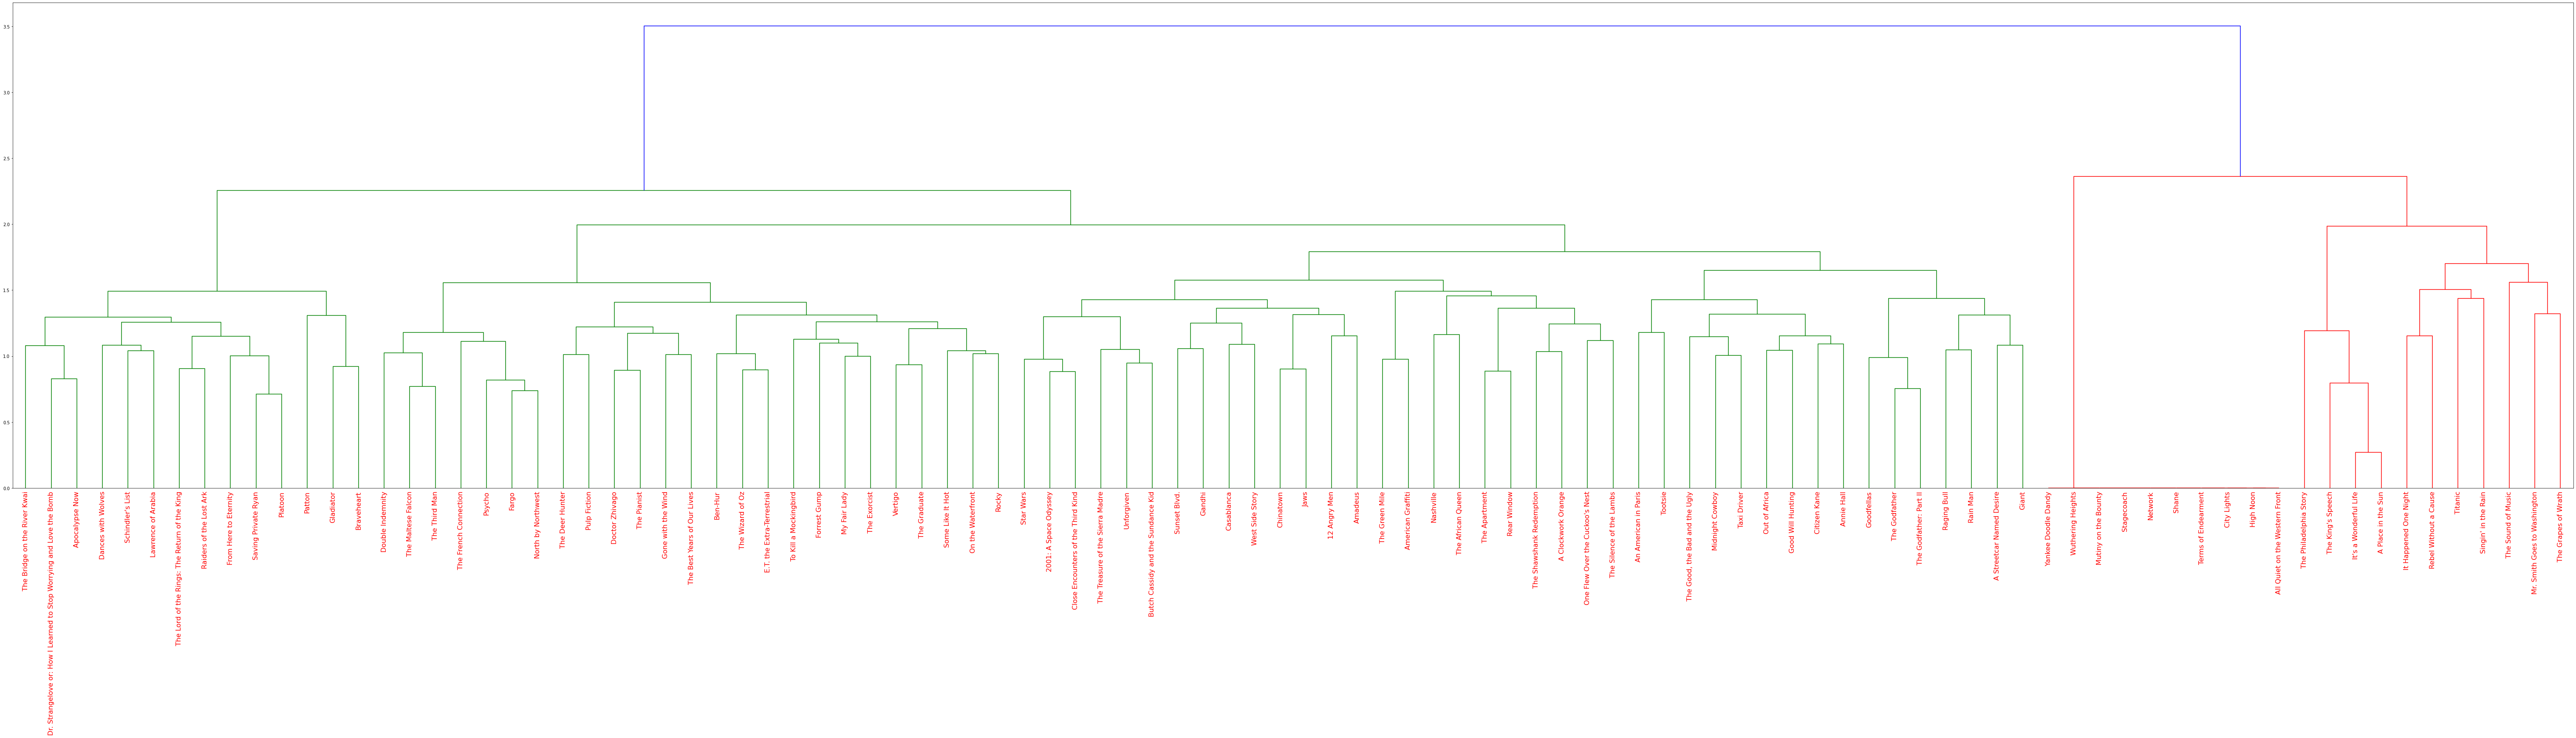

In [27]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(similarity_scores,method='complete')

dendrogram = dendrogram(mergings,labels=[x for x in data['title']],leaf_rotation=90,leaf_font_size=16)

fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()